# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and Structuring the Data

In [3]:
df = pd.read_csv('SpotifyFeatures.csv')

In [4]:
df.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

### Checking for any NULL Values

In [6]:
df.isnull().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Dropping it directly

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

No NULL Values now

### Getting information about the Genres

In [9]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

### Adding the duration in minutes column

In [10]:
df['duration_min'] = (df['duration_ms'] / 60000).round(2)

In [11]:
df.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.00000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.66
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.29
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.84
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.00000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.54
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.38
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.358,2.68
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533,3.54
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274,4.00
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.765,3.77
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718,2.54


### Getting column list

In [12]:
df.columns.tolist()

['genre',
 'artist_name',
 'track_name',
 'track_id',
 'popularity',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'time_signature',
 'valence',
 'duration_min']

### Dropping every row with 0 popularity to avoid unnecessary noise

In [13]:
df = df[df['popularity'] > 0]

### Adding the popularity bucket column for additional insights

In [14]:
def bucket_popularity(pop):
    if pop == 75:
        return 'High'
    elif pop >= 50:
        return 'Medium'
    else:
        return 'Low'

df['popularity_bucket'] = df['popularity'].apply(bucket_popularity)

In [15]:
df = df.drop('duration_ms',axis=1)

In [16]:
df.head(10)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min,popularity_bucket
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,0.737,0.00000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.29,Low
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,0.131,0.00000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.84,Low
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,0.225,0.12300,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.38,Low
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.3440,0.703,0.270,0.00000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.533,3.54,Low
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.9390,0.416,0.269,0.00000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.274,4.00,Low
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.3190,0.598,0.705,0.00125,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.718,2.54,Low
11,Movie,Randy Newman,The Hanging (Maverick - Original Motion Pictur...,0hprxsuRM5vVCOfaM7l3gQ,2,0.0383,0.230,0.133,0.88700,C,0.0872,-19.051,Major,0.0302,91.739,4/4,0.118,2.02,Low
12,Movie,Idoles De La Musique,J'ai demandé à la lune,0jF6HUm18fg6QQCLHhfhC0,4,0.2150,0.680,0.600,0.07290,F#,0.1110,-7.702,Minor,0.0258,110.026,4/4,0.433,3.56,Low
13,Movie,Chorus,Mangala Aarti,0jIY0oRAp1T4mezDyEhOad,3,0.9580,0.758,0.264,0.00000,D#,0.0543,-11.966,Major,0.0496,110.068,3/4,0.742,5.14,Low
17,Movie,Bernard Minet,Ultra Man 80,0x8xSaoSfQkOYUnG1nbga0,3,0.4880,0.744,0.953,0.00000,E,0.4530,-4.986,Major,0.0370,129.959,4/4,0.926,2.97,Low


The data looks clean and structured. Now let's get to some analysis

I have divided the analysis into 4 different areas of insight. Let's start then...

# Insight Area 1: What Makes a Song Popular?

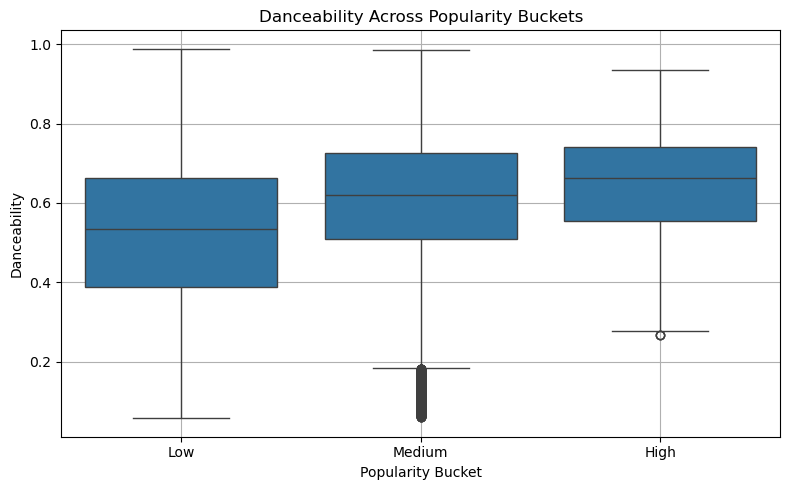

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='popularity_bucket', y='danceability')
plt.title('Danceability Across Popularity Buckets')
plt.xlabel('Popularity Bucket')
plt.ylabel('Danceability')
plt.grid(True)
plt.tight_layout()

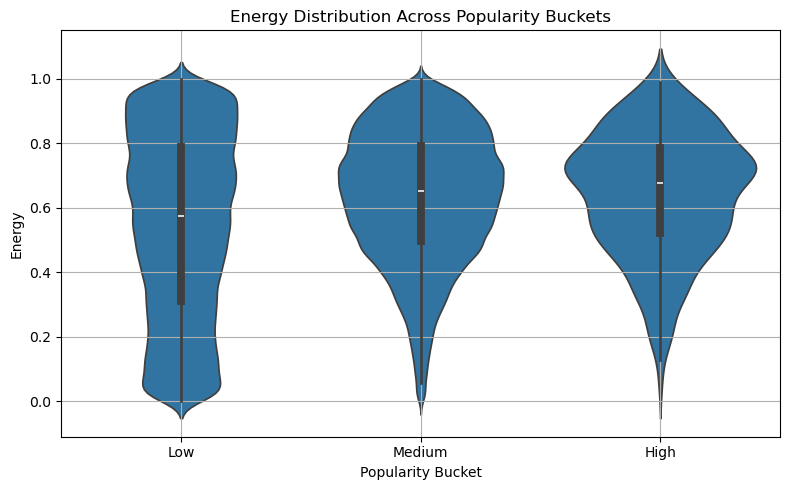

In [18]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='popularity_bucket', y='energy')
plt.title('Energy Distribution Across Popularity Buckets')
plt.xlabel('Popularity Bucket')
plt.ylabel('Energy')
plt.grid(True)
plt.tight_layout()

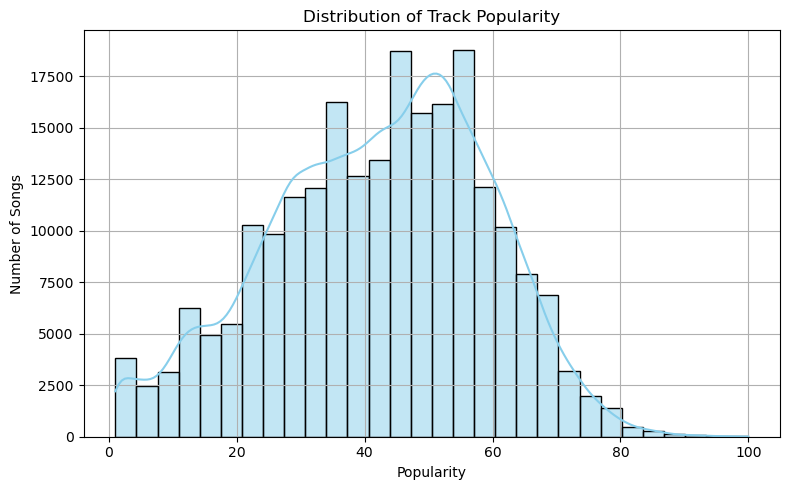

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='popularity', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Songs')
plt.grid(True)
plt.tight_layout()

# Insight Area 2: Genre Influence on Audio and Popularity

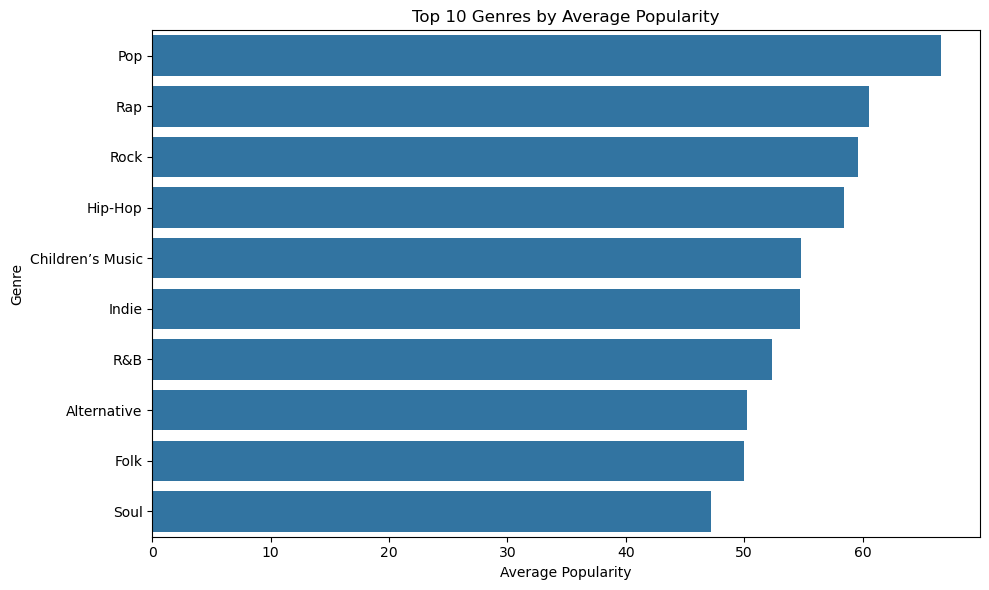

In [20]:
top_genres = df['genre'].value_counts().head(20).index
genre_popularity = df[df['genre'].isin(top_genres)].groupby('genre')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_popularity.values, y=genre_popularity.index)
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.tight_layout()

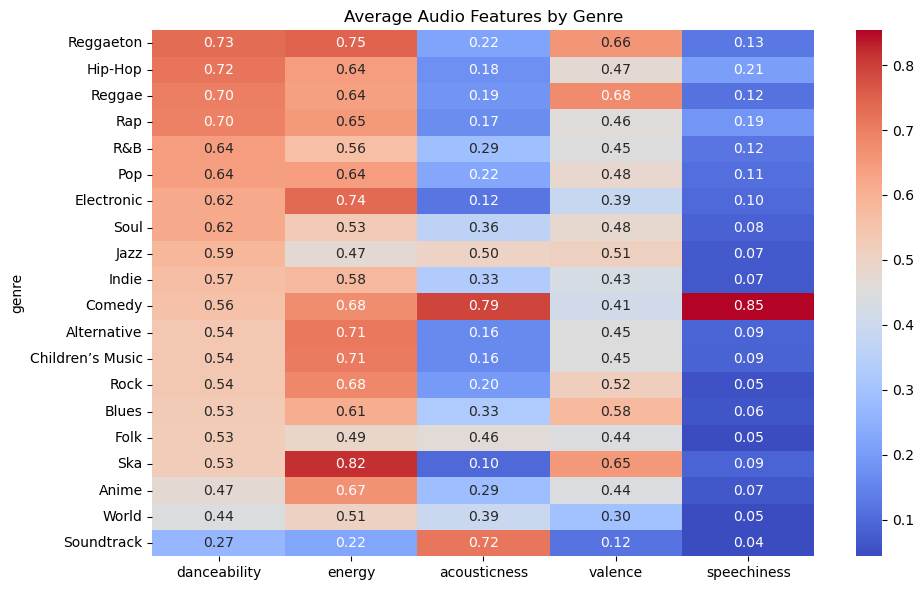

In [21]:
selected_features = ['danceability', 'energy', 'acousticness', 'valence', 'speechiness']
genre_audio = df[df['genre'].isin(top_genres)].groupby('genre')[selected_features].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(genre_audio.sort_values(by='danceability', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Average Audio Features by Genre')
plt.tight_layout()

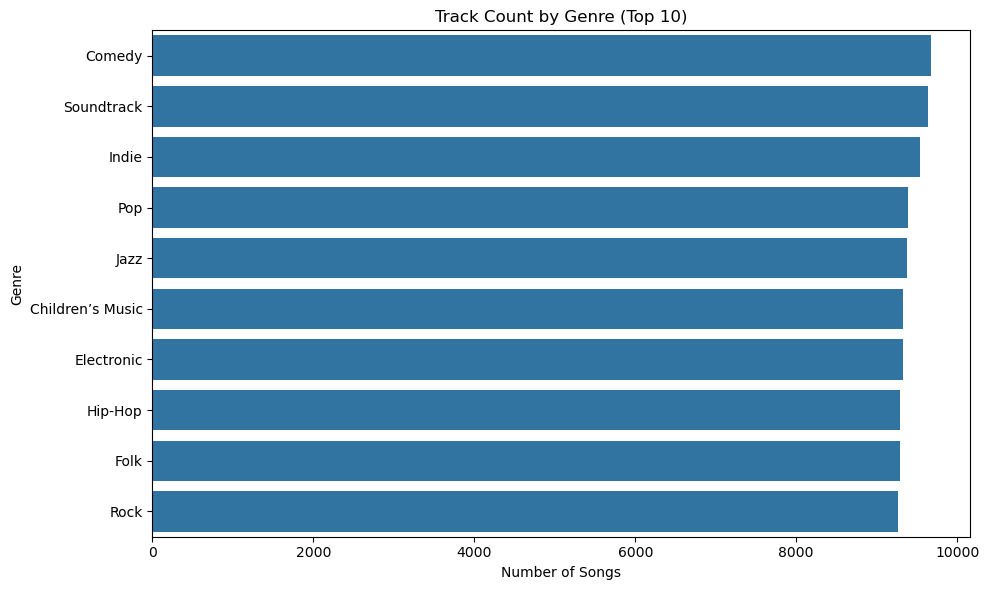

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['genre'].isin(top_genres)], y='genre', order=df['genre'].value_counts().loc[top_genres].index[:10])
plt.title('Track Count by Genre (Top 10)')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.tight_layout()

# Insight Area 3: Feature Correlations & Interactions

In [23]:
features = [
    'popularity', 'danceability', 'energy', 'valence',
    'acousticness', 'speechiness', 'tempo',
    'instrumentalness', 'liveness', 'loudness', 'duration_min'
]

corr = df[features].corr()

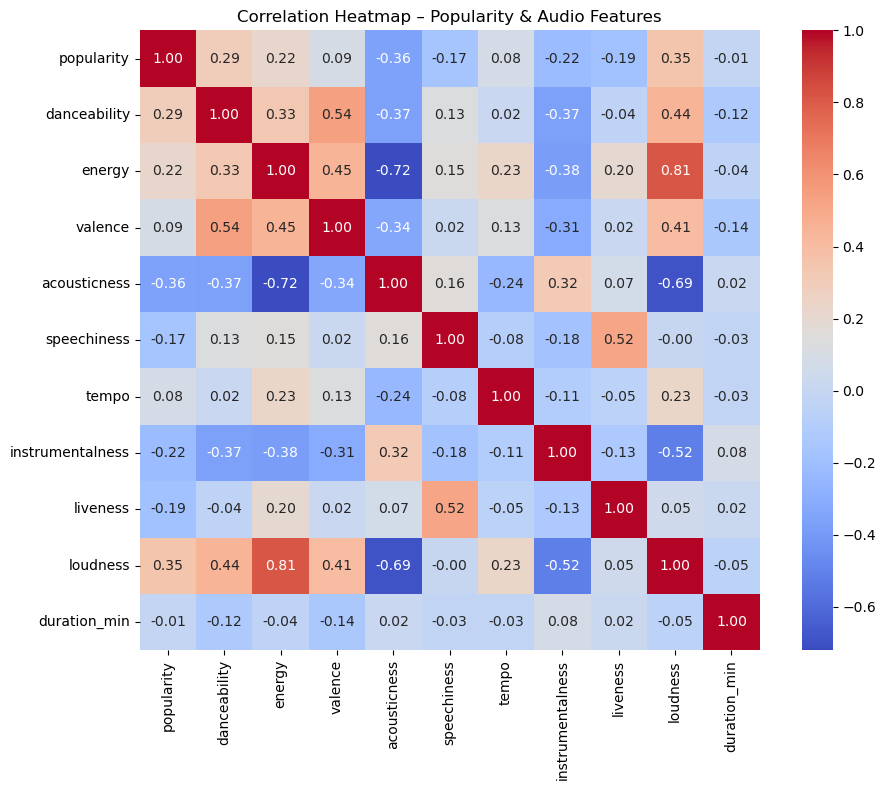

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap – Popularity & Audio Features')
plt.tight_layout()

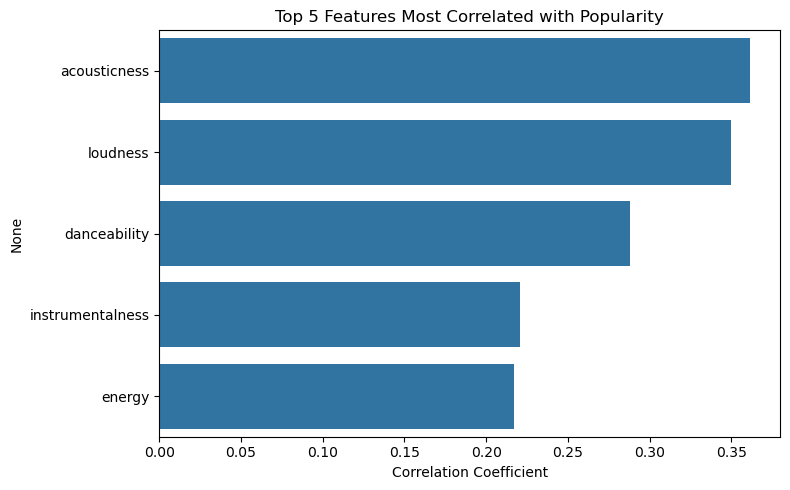

In [25]:
pop_corr = corr['popularity'].drop('popularity')
top_corr = pop_corr.abs().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 5 Features Most Correlated with Popularity')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()

# Insight Area 4: Artist & Track Highlights

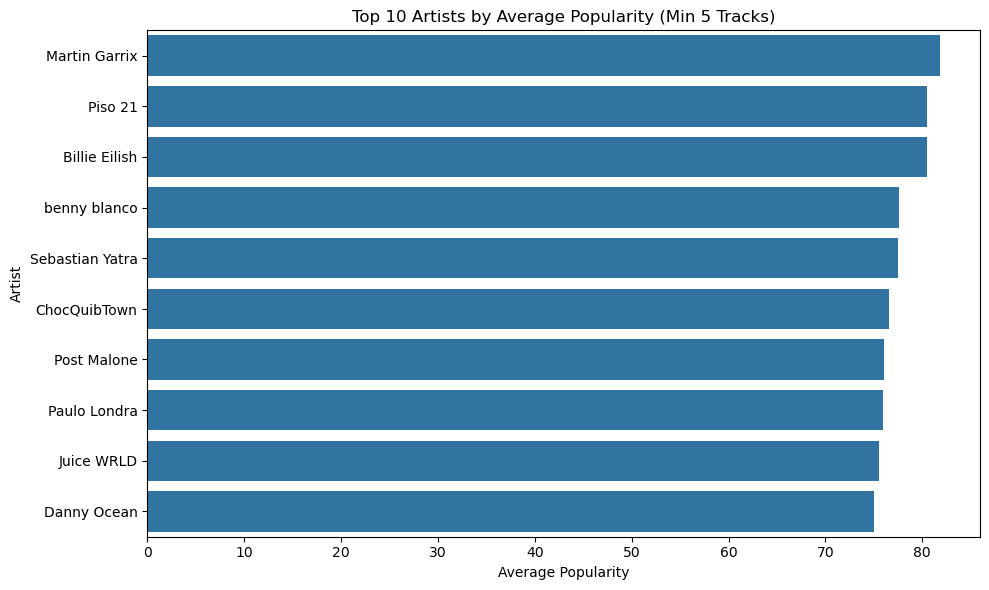

In [26]:
artist_group = df.groupby('artist_name').agg({
    'popularity': ['mean', 'count']
})
artist_group.columns = ['avg_popularity', 'track_count']
top_artists = artist_group[artist_group['track_count'] >= 5].sort_values('avg_popularity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists['avg_popularity'], y=top_artists.index)
plt.title('Top 10 Artists by Average Popularity (Min 5 Tracks)')
plt.xlabel('Average Popularity')
plt.ylabel('Artist')
plt.tight_layout()

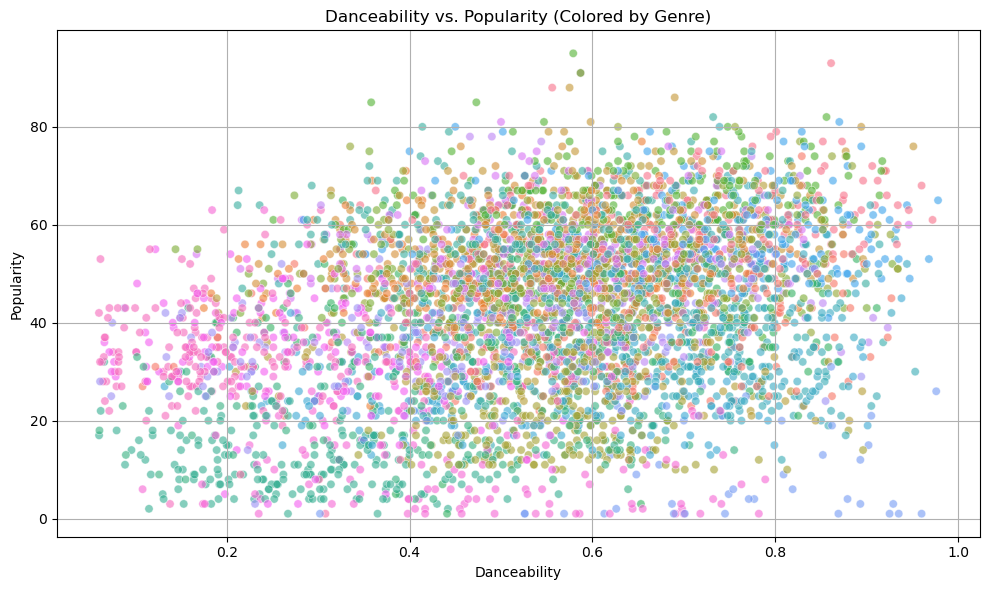

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(5000), x='danceability', y='popularity', hue='genre', alpha=0.6, palette='husl', legend=False)
plt.title('Danceability vs. Popularity (Colored by Genre)')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()

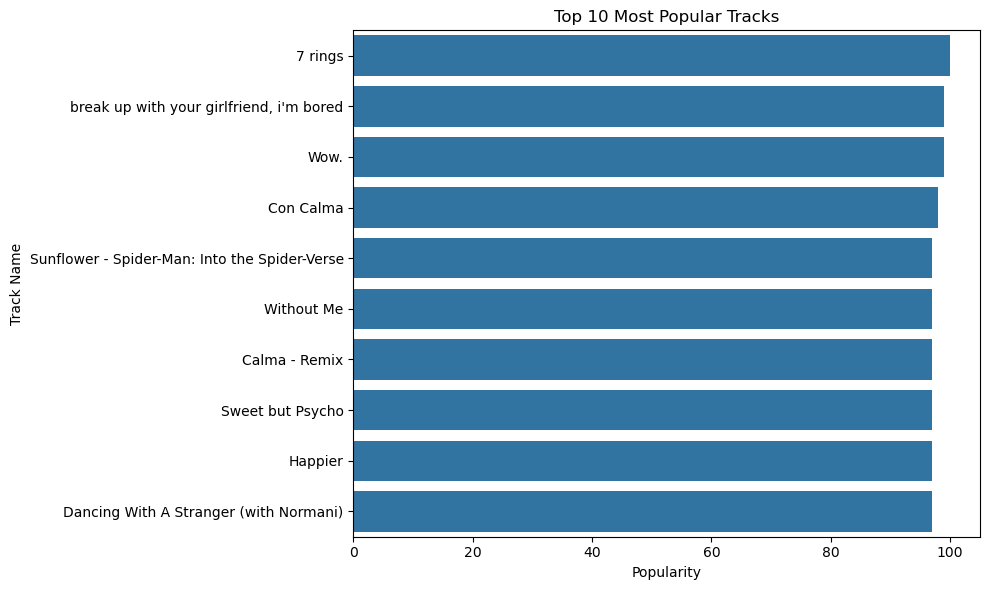

In [28]:
top_tracks = df.sort_values('popularity', ascending=False).drop_duplicates('track_name').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_tracks['popularity'], y=top_tracks['track_name'])
plt.title('Top 10 Most Popular Tracks')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.tight_layout()